In [21]:
import time
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
#======Sorting Algorithms=====
#(1) Insertion sort;
def insertion(A):
    n=len(A)
    for j in range(1,n):
        key=A[j]
        i=j-1
        while i>=0 and A[i]>key:
            A[i+1]=A[i]
            i=i-1
        A[i+1]=key
    return A
#(2) Selection sort;
def selection(A):
    n=len(A)
    for j in range(0,n-1):
        #select the jth smallest
        for i in range(j+1,n):
            tem=A[j]
            while A[i]<tem:
                A[j]=A[i]
                A[i]=tem
                tem=A[j]
    return A
#(3) Bubble sort;
def bubble(A):
    n=len(A)
    for j in range(0,n-1):
        
        for i in range(n-1-j):
            tem=A[i]
            if tem>A[i+1]:
                A[i]=A[i+1]
                A[i+1]=tem
            else:
                continue
    return A
#(4) Merge sort.
def mergeson(B,C):
    N=len(B)
    M=len(C)
    i=0
    j=0
    A=[]
    while i<N and j<M:
        if B[i]<C[j]:
            A.append(B[i])
            i=i+1
        else:
            A.append(C[j])
            j=j+1
    A.extend(B[i:])
    A.extend(C[j:])
    return A
def mergeson2(B,C):
    N=len(B)
    M=len(C)
    B.append(float('inf'))
    C.append(float('inf'))
    A=[0 for i in range(N+M)]
    i=0
    j=0
    for k in range(N+M):
        if B[i]<=C[j]:
            A[k]=B[i]
            i=i+1
        else:
            A[k]=C[j]
            j=j+1
    return A  
def merge(A):
    n=len(A)
    if n>1:
        q=int(n/2)
        B=[A[i] for i in range(0,q)]
        C=[A[i]for i in range(q,n)]
        B=merge(B)
        C=merge(C)
        #return mergeson(B,C)
        return mergeson2(B,C)
    else:
        return A

In [23]:
#=====Experiments=====
def time_measurer(func,A):
    start=time.perf_counter()
    func(A)
    end=time.perf_counter()
    return end -start
def experimenter(ns,filename="results.xlsx"):
    results={"n":[],"insertion":[],"selection":[],"bubble":[],"merge":[]}
    for n in ns:
        A=list(range(n,0,-1))
        results["n"].append(n)
        results["insertion"].append(time_measurer(insertion,A))
        results["selection"].append(time_measurer(selection,A))
        results["bubble"].append(time_measurer(bubble,A))
        results["merge"].append(time_measurer(merge,A))
        print(f'n={n} done')
    df=pd.DataFrame({
        "n":results["n"],
        "insertion":results["insertion"],
        "selection":results["selection"],
        "bubble":results["bubble"],
        "merge":results["merge"]
    })
    df.to_excel(filename,index=False,float_format="%.6f",sheet_name="results")
    print(f'experimental results saved to  {filename}') 
    return df
def ploter(df,filename="sorting_results.png"):
    plt.figure(figsize=(8,6))
    for col in df.columns[1:]:
        plt.plot(df["n"],df[col],marker="o",label=col)
    plt.xlabel("n")
    plt.ylabel("CPU time(s)")
    plt.title("Sorting Algorithm CPU time Comparison")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(filename,dpi=300)
    plt.show()
    print(f'figure saved to {filename}')

n=1000 done
n=2000 done
n=3000 done
n=4000 done
n=5000 done
n=6000 done
n=7000 done
n=8000 done
n=9000 done
n=10000 done
experimental results saved to  results.xlsx


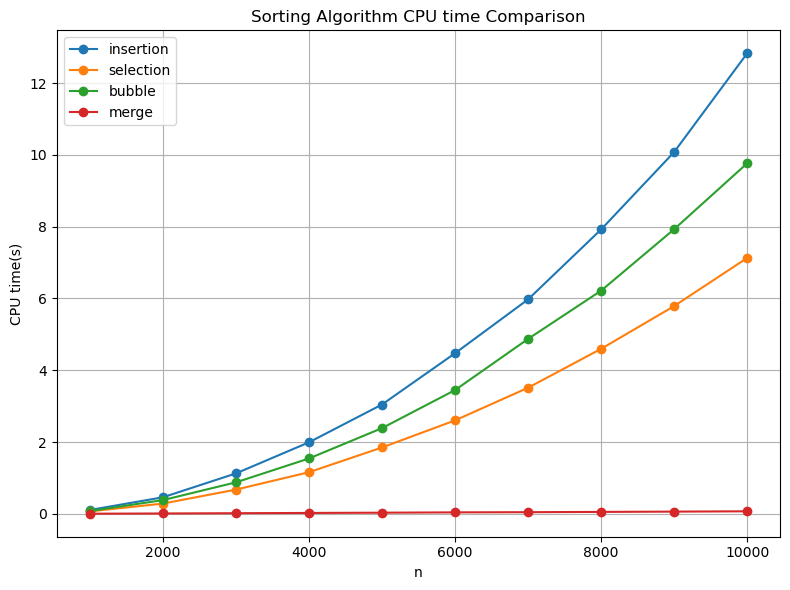

figure saved to sorting_results.png


In [24]:
#=====Main=====
if __name__=="__main__":
    ns=[1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]
    results=experimenter(ns)
    ploter(results)
